### Tasks
#### 1) Retrieve and Compile data from MySQL 
#### 2) EDA
#### 3) Data Pre-processing
#### 4) Graphs & Visualizations with Seaborn

In [240]:
from sqlalchemy import create_engine
import mysql.connector as mysql
import seaborn as sns
import pymysql
import csv
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import squarify
plt.rcParams.update({'font.size': 18})

### 1 - Retrieve and Compile data from MySQL

In [241]:
password = '40179589Fa$$'
connection = 'mysql+pymysql://root:' + password + '@localhost:3306/los_puche'
db_connection = create_engine(connection)

In [242]:
sales_table_query = '''
                SELECT v.dt, p.product, p.category, v.qty, (p.unit_cost * v.qty) AS cogs,
                v.total, (total - (p.unit_cost * v.qty)) as profit
                FROM ventas v
                JOIN productos p
                ON v.product_id = p.product_id;
                    '''

to_filter = ''' 
SELECT v.dt, p.product, p.category, v.qty, (p.unit_cost * v.qty) AS cogs, v.total, (total - (p.unit_cost * v.qty)) as profit
                FROM ventas v
                JOIN productos p
                ON v.product_id = p.product_id
where (total - (p.unit_cost * v.qty)) < 0
and total != 0;
         '''

In [243]:
pre_df = pd.read_sql_query(sales_table_query, con=db_connection)
pre_df.shape

(11014, 7)

In [244]:
df_to_filter = pd.read_sql_query(to_filter, con=db_connection)
df_to_filter.shape

(29, 7)

In [245]:
# Whole Table 
df = pre_df[~pre_df.index.isin(df_to_filter.index)]
df

,dt,product,category,qty,cogs,total,profit
29,2022-06-26,SIMPLE FAZ A4 1,Fotocopia,14.0,0.000,140.0,140.000
30,2022-06-26,Baggio Fresh Manzana Liviano 200ml,Agua Saborizada,1.0,49.000,70.0,21.000
31,2022-06-26,Tostex Barbacoa 125g,Snack,1.0,113.000,150.0,37.000
32,2022-06-26,Marlboro Común 12,Cigarrillo,1.0,240.000,330.0,90.000
33,2022-06-26,Cabalgata Guaraná 3000ml,Gaseosa,1.0,192.000,300.0,108.000
...,...,...,...,...,...,...,...
11009,2022-12-03,Brahma 473ml,Cerveza,3.0,450.000,690.0,240.000
11010,2022-12-03,Coca Cola Retornable 1500ml,Gaseosa,1.0,250.000,320.0,70.000
11011,2022-12-03,Miller 473ml,Cerveza,1.0,165.000,240.0,75.000
11012,2022-12-03,Encendedor Candela 1,Varios,1.0,62.000,100.0,38.000


### 2- EDA

In [246]:
df.head()

,dt,product,category,qty,cogs,total,profit
29,2022-06-26,SIMPLE FAZ A4 1,Fotocopia,14.0,0.0,140.0,140.0
30,2022-06-26,Baggio Fresh Manzana Liviano 200ml,Agua Saborizada,1.0,49.0,70.0,21.0
31,2022-06-26,Tostex Barbacoa 125g,Snack,1.0,113.0,150.0,37.0
32,2022-06-26,Marlboro Común 12,Cigarrillo,1.0,240.0,330.0,90.0
33,2022-06-26,Cabalgata Guaraná 3000ml,Gaseosa,1.0,192.0,300.0,108.0


In [247]:
df.tail()

,dt,product,category,qty,cogs,total,profit
11009,2022-12-03,Brahma 473ml,Cerveza,3.0,450.000,690.0,240.000
11010,2022-12-03,Coca Cola Retornable 1500ml,Gaseosa,1.0,250.000,320.0,70.000
11011,2022-12-03,Miller 473ml,Cerveza,1.0,165.000,240.0,75.000
11012,2022-12-03,Encendedor Candela 1,Varios,1.0,62.000,100.0,38.000
11013,2022-12-03,Fanta Naranja 500 ml,Gaseosa,1.0,166.666,220.0,53.334


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10985 entries, 29 to 11013
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dt        10985 non-null  object 
 1   product   10985 non-null  object 
 2   category  10985 non-null  object 
 3   qty       10985 non-null  float64
 4   cogs      10985 non-null  float64
 5   total     10985 non-null  float64
 6   profit    10985 non-null  float64
dtypes: float64(4), object(3)
memory usage: 686.6+ KB


In [249]:
df.describe()

,qty,cogs,total,profit
count,10985.000000,10985.000000,10985.000000,10985.000000
mean,31.235594,166.575903,238.798552,72.222649
std,119.731050,188.966861,249.027240,129.919955
min,0.000000,0.000000,0.000000,-1642.500000
25%,1.000000,41.000000,80.000000,25.000000
50%,1.000000,120.000000,180.000000,60.000000
75%,2.000000,240.000000,330.000000,100.000000
max,3000.000000,3273.910000,4250.000000,4200.000000


In [250]:
# % of Null/Na values

df.isnull().mean()*100

dt          0.0
product     0.0
category    0.0
qty         0.0
cogs        0.0
total       0.0
profit      0.0
dtype: float64

### 3) Data Pre-processing
##### (Compiling the tables for later visualization)

#### A) Average revenue over time

In [263]:
avg_rev_query = '''
                select month, round(AVG(total_rev), 1) as average_rev
                from (SELECT MONTH(dt) AS month, SUM(profit) as total_rev
                      FROM sales
                      WHERE month <> 6
                      AND month <> 12
                      GROUP BY dt) AS total_daily_rev
                group by month
                '''
avg_rev_table = pd.read_sql_query(avg_rev_query, con=db_connection)
months = {7:"July", 8:"August", 9:"September", 10:"October", 11:"November"}
avg_rev_table = avg_rev_table.replace({"month":months})
avg_rev_table

,month,average_rev
0,July,4793.4
1,August,4303.2
2,September,4993.4
3,October,5239.4
4,November,5804.1


In [260]:
total_rev_query = '''
                SELECT MONTH(dt) AS month, ROUND(SUM(profit),2) as total_rev
                      FROM sales
                      WHERE month <> 6
                      AND month <> 12
                      GROUP BY MONTH(dt)
                '''
total_rev_table = pd.read_sql_query(total_rev_query, con=db_connection)
months = {7:"July", 8:"August", 9:"September", 10:"October", 11:"November"}
total_rev_table = total_rev_table.replace({"month":months})
total_rev_table

,month,total_rev
0,July,148594.36
1,August,133397.66
2,September,149802.44
3,October,162421.41
4,November,174123.39


In [278]:
pct_change_rev_table_query = '''
                        SELECT a.month, a.total_rev, b.month AS next_month, b.total_rev as next_month_rev,
                               ROUND((cast(b.total_rev-a.total_rev as float) / a.total_rev)*100,2) AS pct_change
                        FROM monthly_rev a
                        LEFT JOIN monthly_rev b
                        ON ( a.month + 1 = b.month)
                        ORDER BY a.month
                         '''
pct_change_rev_table = pd.read_sql_query(pct_change_rev_table_query, con=db_connection)
pct_change_rev_table = pct_change_rev_table.fillna(0)
pct_change_rev_table = pct_change_rev_table.replace({"month":months, "next_month":months})
pct_change_rev_table = pct_change_rev_table[0:4]

In [279]:
pct_change_rev_table

,month,total_rev,next_month,next_month_rev,pct_change
0,July,148594.4,August,133397.7,-10.23
1,August,133397.7,September,149802.4,12.30
2,September,149802.4,October,162421.4,8.42
3,October,162421.4,November,174123.4,7.20


#### B) Top 5 products & categories by revenue

##### Products

In [234]:
top_products_query = '''
                    SELECT product, SUM(profit) AS total_rev
                    FROM sales
                    GROUP BY product
                    ORDER BY total_rev DESC
                    LIMIT 5
                    '''
top5_products = pd.read_sql_query(top_products_query, con=db_connection)
top5_products

,product,total_rev
0,Trámites,112350.0
1,Carga Virtual,31469.0
2,IMPRESIÓN A4 1,22810.0
3,DNI 1,20260.0
4,Coca Cola 2250ml,19507.0


##### Categories

In [89]:
top_categories_query = '''
                    SELECT category, ROUND(SUM(profit)) AS total_rev
                    FROM sales
                    GROUP BY category
                    ORDER BY total_rev DESC
                    LIMIT 5
                    '''
top5_categories = pd.read_sql_query(top_categories_query, con=db_connection)
top5_categories

,category,total_rev
0,Fotocopia,189290.0
1,Cigarrillo,128369.0
2,Cerveza,122001.0
3,Gaseosa,75357.0
4,Carga,31469.0


#### C) 5 least sold products of the most sold categories by revenue

In [91]:
# Products

bot_products_query = '''
                    SELECT product, ROUND(SUM(profit)) AS total_rev
                    FROM sales
                    WHERE category IN ("Fotocopia", "Cigarrillo", "Cerveza", "Gaseosa", "Carga")
                    AND profit > 0
                    GROUP BY product
                    ORDER BY total_rev ASC
                    LIMIT 5
                    '''
bottom5_products = pd.read_sql_query(bot_products_query, con=db_connection)
bottom5_products

,product,total_rev
0,Secco Pomelo 500 cc,30.0
1,Cigarrillos CJ Rubios Convertible,50.0
2,Cabalgata Lima 500ml,80.0
3,Mirinda Naranja Lata 354ml,80.0
4,Imperial IPA 473 ml,90.0


In [93]:
# Categories

bottom_categories_query = '''
                    SELECT category, ROUND(SUM(profit)) AS total_rev
                    FROM sales
                    WHERE profit > 0
                    GROUP BY category
                    ORDER BY total_rev ASC
                    LIMIT 5
                    '''
bottom5_categories = pd.read_sql_query(bottom_categories_query, con=db_connection)
bottom5_categories

,category,total_rev
0,Mercería,75.0
1,Pastas,224.0
2,Embutidos,657.0
3,Cotillón,1042.0
4,Espumante,1286.0


#### D) Top 5 products & categories during weekdays and weekends

In [94]:
# Products on WEEKDAYS
products_weekdays_query = '''
                        SELECT product, sum(profit) as total_profit
                        FROM sales
                        WHERE DAYOFWEEK(dt) <> 1
                        OR DAYOFWEEK(dt) <> 7
                        GROUP BY product
                        ORDER BY total_profit DESC
                        LIMIT 5
                           '''
top5_products_weekdays = pd.read_sql_query(products_weekdays_query, con=db_connection)
top5_products_weekdays

,product,total_profit
0,Trámites,112350.0
1,Carga Virtual,31469.0
2,IMPRESIÓN A4 1,22810.0
3,DNI 1,20260.0
4,Coca Cola 2250ml,19507.0


In [95]:
# Products on WEEKENDS
products_weekends_query = '''
                        SELECT product, ROUND(SUM(profit)) as total_profit
                        FROM sales
                        WHERE DAYOFWEEK(dt) LIKE 1
                        OR DAYOFWEEK(dt) LIKE 7
                        GROUP BY product
                        ORDER BY total_profit DESC
                        LIMIT 5
                '''
top5_products_weekends = pd.read_sql_query(products_weekends_query, con=db_connection)
top5_products_weekends

,product,total_profit
0,Carga Virtual,12319.0
1,Coca Cola 2250ml,9969.0
2,Viñas de Balbo 1125ml,8314.0
3,Quilmes Bajo Cero Retornable 1000ml,7500.0
4,Imperial Golden 473ml,7020.0


In [96]:
# Categories on WEEKDAYS
categories_weekdays_query = '''
                        SELECT category, ROUND(SUM(profit)) as total_profit
                        FROM sales
                        WHERE DAYOFWEEK(dt) <> 1
                        OR DAYOFWEEK(dt) <> 7
                        GROUP BY category
                        ORDER BY total_profit DESC
                        LIMIT 5
                           '''
top5_categories_weekdays = pd.read_sql_query(categories_weekdays_query, con=db_connection)
top5_categories_weekdays

,category,total_profit
0,Fotocopia,189290.0
1,Cigarrillo,128369.0
2,Cerveza,122001.0
3,Gaseosa,75357.0
4,Carga,31469.0


In [97]:
# Categories on WEEKENDS
categories_weekends_query = '''
                        SELECT category, ROUND(SUM(profit)) as total_profit
                        FROM sales
                        WHERE DAYOFWEEK(dt) LIKE 1
                        OR DAYOFWEEK(dt) LIKE 7
                        GROUP BY category
                        ORDER BY total_profit DESC
                        LIMIT 5
                        '''
top5_categories_weekends = pd.read_sql_query(categories_weekends_query, con=db_connection)
top5_categories_weekends

,category,total_profit
0,Cerveza,56894.0
1,Cigarrillo,40652.0
2,Gaseosa,33079.0
3,Fotocopia,14880.0
4,Carga,12319.0


### 4) Graphs & Visualizations with Seaborn and Matplotlib

#### A) Average monthly revenue over time

In [280]:
pct_change_rev_table

,month,total_rev,next_month,next_month_rev,pct_change
0,July,148594.4,August,133397.7,-10.23
1,August,133397.7,September,149802.4,12.30
2,September,149802.4,October,162421.4,8.42
3,October,162421.4,November,174123.4,7.20


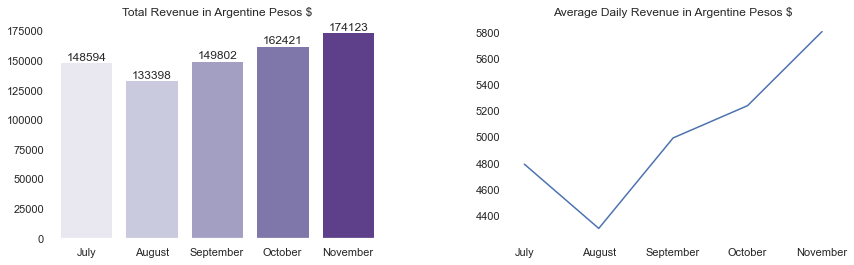

In [277]:
sns.set(rc={'figure.figsize':(14,6)})
fig, axes = plt.subplots(1, 2,facecolor=('w'))
fig.tight_layout(pad=8)

#sns.set(rc={'figure.figsize':(6,4)})
ax1 = sns.lineplot(data=avg_rev_table, y='average_rev', x='month', ax=axes[1], palette='#E3F4FF')
ax1.set_facecolor('white')
ax1.set(title='Average Daily Revenue in Argentine Pesos $')
ax1.set(ylabel=None)
ax1.set(xlabel=None)
ax1.grid(None)

ax3 = sns.barplot(data=total_rev_table, y='total_rev', x='month', ax=axes[0], palette='Purples')
ax3.title.set_text('Total Revenue in Argentine Pesos $')
ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax3.grid(False)
ax3.set_facecolor('white')
for i in ax3.containers:
    ax3.bar_label(i,)

#### B) Top 5 products & categories by revenue

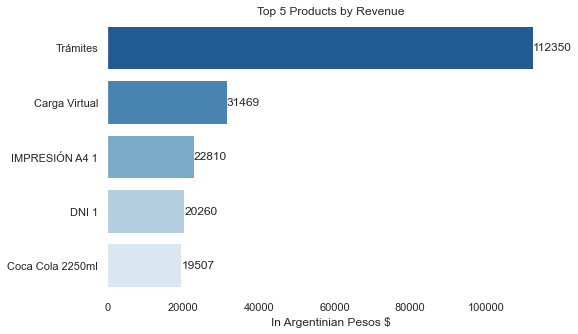

In [224]:
# Products
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.barplot(data=top5_products, y='product', x='total_rev', palette="Blues_r")
ax.set_facecolor('white')
ax.set(xlabel="In Argentinian Pesos $")
ax.set(ylabel=None)
ax.set(title='Top 5 Products by Revenue')
for i in ax.containers:
    ax.bar_label(i,)

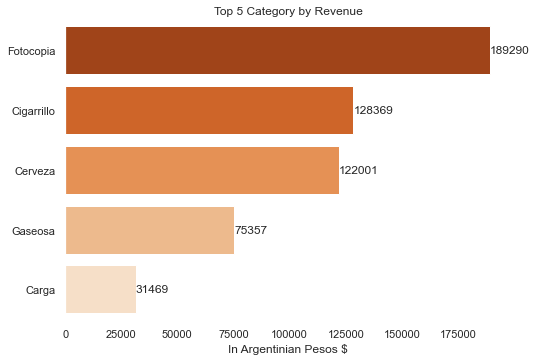

In [289]:
# Category 
sns.set(rc={'figure.figsize':(8,5.5)})
ax = sns.barplot(data=top5_categories, y='category', x='total_rev', palette="Oranges_r")
ax.set_facecolor('white')
ax.set(xlabel="In Argentinian Pesos $")
ax.set(ylabel=None)
ax.set(title='Top 5 Category by Revenue')
for i in ax.containers:
    ax.bar_label(i,)

#### C) 5 least sold products of top categories by revenue

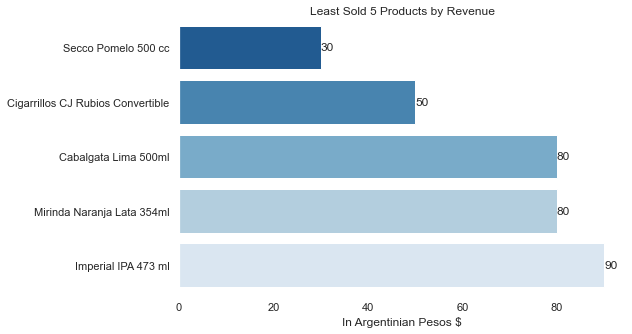

In [223]:
# Products
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.barplot(data=bottom5_products, y='product', x='total_rev', palette="Blues_r")
ax.set_facecolor('white')
ax.set(xlabel="In Argentinian Pesos $")
ax.set(ylabel=None)
ax.set(title='Least Sold 5 Products by Revenue')
for i in ax.containers:
    ax.bar_label(i,)

##### D) 5 least sold categories by revenue.

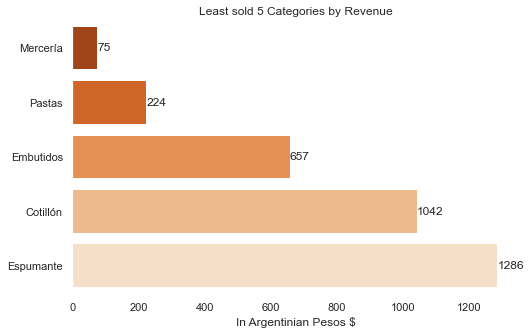

In [290]:
# Categories
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.barplot(data=bottom5_categories, y='category', x='total_rev', palette="Oranges_r")
ax.set_facecolor('white')
ax.set(xlabel="In Argentinian Pesos $")
ax.set(ylabel=None)
ax.set(title='Least sold 5 Categories by Revenue')
for i in ax.containers:
    ax.bar_label(i,)

#### E) Top 5 products & categories during weekdays and weekends

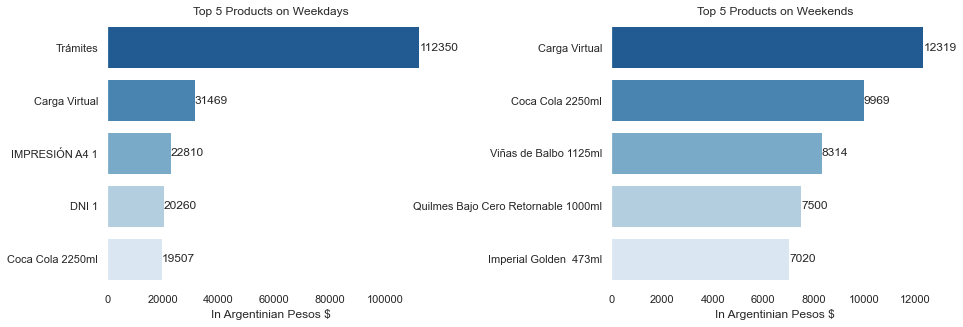

In [132]:
# Products

sns.set(rc={'figure.figsize':(16,8)})
fig.suptitle('asdf', fontsize=12)
fig, axes = plt.subplots(1, 2,facecolor=('w'))
fig.tight_layout(pad=12)

ax1 = sns.barplot(data=top5_products_weekdays, y='product', x='total_profit', ax=axes[0], palette='Blues_r')
ax1.title.set_text('Top 5 Products on Weekdays')
ax1.set(xlabel="In Argentinian Pesos $")
ax1.set(ylabel=None)
ax1.grid(False)
ax1.set_facecolor('white')
for i in ax1.containers:
    ax1.bar_label(i,)

ax2 = sns.barplot(data=top5_products_weekends, y='product', x='total_profit', ax=axes[1], palette='Blues_r')
ax2.title.set_text('Top 5 Products on Weekends')
ax2.set(xlabel="In Argentinian Pesos $")
ax2.set(ylabel=None)
ax2.grid(False)
ax2.set_facecolor('white')
for i in ax2.containers:
    ax2.bar_label(i,)

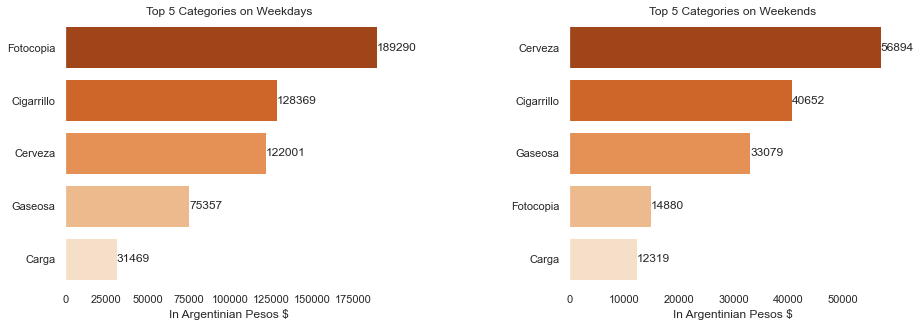

In [291]:
# Categories

sns.set(rc={'figure.figsize':(16,8)})
fig.suptitle('asdf', fontsize=12)
fig, axes = plt.subplots(1, 2,facecolor=('w'))
fig.tight_layout(pad=12)

ax1 = sns.barplot(data=top5_categories_weekdays, y='category', x='total_profit', ax=axes[0], palette='Oranges_r')
ax1.title.set_text('Top 5 Categories on Weekdays')
ax1.set(xlabel="In Argentinian Pesos $")
ax1.set(ylabel=None)
ax1.grid(False)
ax1.set_facecolor('white')
for i in ax1.containers:
    ax1.bar_label(i,)

ax2 = sns.barplot(data=top5_categories_weekends, y='category', x='total_profit', ax=axes[1], palette='Oranges_r')
ax2.title.set_text('Top 5 Categories on Weekends')
ax2.set(xlabel="In Argentinian Pesos $")
ax2.set(ylabel=None)
ax2.grid(False)
ax2.set_facecolor('white')
for i in ax2.containers:
    ax2.bar_label(i,)